In [ ]:
import numpy as np
import cv2
import os
import glob
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
# Download images for Practical 3
!wget https://github.com/dsphamgithub/comp3007/raw/main/prac03/prac03.zip -O prac03.zip
!unzip prac03.zip

# Exercise 1
In this exercise, you will experiment with two corner detection methods. Write a program to detect
strong corners in an image. You should start with the __Harris detection__ method, then __Shi-Tomasi__. With
each method, try to vary the parameters and observe the detection results. You will detect corners in
three images
- An ideal checkerboard image;
- The same checkerboard image with with gradual reduction of contrast;
- The same checkerboard image with both contrast reduction and additional blurring.

For each case, ask yourself what corners you would expect to see and inspect the detection results to
see if it is the case. Observe how contrast reduction and blurring affect the detection.

---
## Harris Corner

### `cv2.cornerHarris()` Function

The function `cv2.cornerHarris()` returns an output that represents the Harris corner response for each pixel in the input image.

### Output Details:

- **Grayscale Image**: The output is a grayscale image (2D array) of the same size as the input image (`gray`).
  
- **Pixel Values**: Each pixel value in the output represents the Harris corner response for the corresponding pixel in the input image.
  
- **Corner Responses**: Higher values in the output indicate stronger corner responses. This suggests that the corresponding pixel in the input image is more likely to be a corner.
  
- **Value Range**: The values in the output can be both positive and negative. Typically:
  - Strong positive values indicate corners.
  - Strong negative values might indicate edges.
  - Values close to zero typically correspond to flat regions in the image.

### Identifying Corners:

To identify actual corner points in the image, you would typically threshold the output of the `cv2.cornerHarris()` function. For example, you might mark pixels as corners if their Harris response is greater than a certain percentage of the maximum response in the output.

### Parameters of the `cv2.cornerHarris()` function:

- **blockSize**:
  - **Description**: It is the size of the neighborhood considered for corner detection.
  - **Typical Values**: 2, 3, or 5.
  - **Purpose**: Determines how big a neighborhood should be considered around each pixel to determine the corner response.

- **ksize**:
  - **Description**: Aperture parameter for the Sobel derivative used.
  - **Typical Values**: 3, 5, or 7.
  - **Purpose**: This is the size of the Sobel kernel used to compute image derivatives. The Sobel operator is used by the Harris function to compute gradients of the image, which are then used in the corner detection process.

- **k**:
  - **Description**: Harris detector free parameter.
  - **Typical Values**: In the range [0.04, 0.06].
  - **Purpose**: It's a constant used in the Harris Corner Detection equation. This parameter determines the sensitivity of the corner response function. A small value of `k` results in detection of sharp corners, while a larger value might detect softer corners.


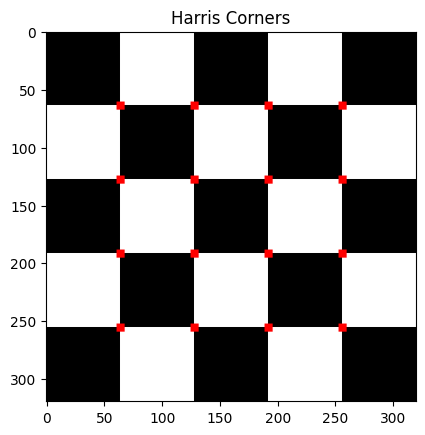

In [ ]:
## Harris Detection Method
img = cv2.imread("prac03ex01img01.png")

def harris_corner_detection(img, ):
    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3:
        gray =
    else:
        gray =

    # Detect Harris corners
    harris_corners =

    # Create a copy of the image to mark the corners
    img_harris =

    # Mark detected corners as red stars

    return img_harris

# Harris corners example
harris_img = harris_corner_detection(img=img, )

# Convert BGR to RGB for displaying with matplotlib
plt.imshow(cv2.cvtColor(harris_img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()

---
## Shi-Tomasi Corner Detection Method

In this experiment, we will explore the Shi-Tomasi corner detection method, which is implemented in OpenCV as the `goodFeaturesToTrack()` function.

### Understanding the Parameters of `goodFeaturesToTrack()`

1. **Function Signature**:
    ```python
    cv2.goodFeaturesToTrack(image, maxCorners, qualityLevel, minDistance)
    ```

2. **Parameters**:
    - `image`: Input 8-bit or floating-point 32-bit, single-channel image.
    - `maxCorners`: Maximum number of corners to return. If set to 0, it will return all the corners. Otherwise, it returns the strongest `maxCorners` corners.
    - `qualityLevel`: Multiplier for the max eigenvalue; specifies the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure. Corners with a quality measure less than the product are rejected.
    - `minDistance`: Minimum possible Euclidean distance between the returned corners.

3. **Output**:
    - The function returns the corners detected in the image. Each corner is represented as a 2D position (x, y).

4. **Usage**:
    - The function detects corners in the grayscale image using the Shi-Tomasi method. It ranks all the corners in the image by their quality and returns the top corners that meet the criteria set by the parameters.

### Applying `goodFeaturesToTrack()` using OpenCV

1. Use OpenCV's `goodFeaturesToTrack()` method to detect corners in an image.
2. Experiment with varying the `qualityLevel` and `minDistance` parameters to observe their impact on the detected corners.
3. Test corner detection on various images to understand the robustness and limitations of the method:
    - Use images with clear corners, such as checkerboards.
    - Test on natural images to see how the method performs in real-world scenarios.


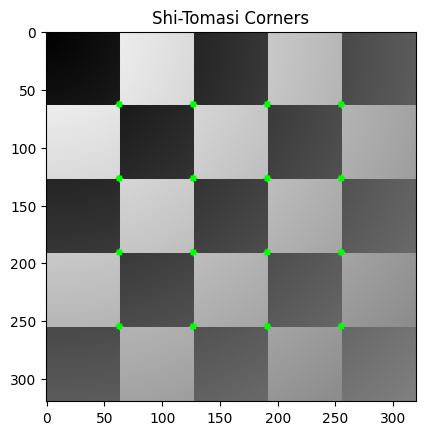

In [ ]:
img = cv2.imread("prac03ex01img02.png")

# Shi Tomashi corner detection
def shi_tomasi_corner_detection(img, ):
    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3:
        gray =
    else:
        gray =

    # Detect Shi-Tomasi corners
    corners = cv2.goodFeaturesToTrack(gray, )

    # Convert the floating point coordinates to integer values
    corners = np.uint(corners)

    # Create a copy of the image to mark the corners
    img_shi_tomasi =

    # Mark detected corners as green stars
    for i in corners:
        x, y = i.ravel()
        cv2.circle(img_shi_tomasi, )

    return img_shi_tomasi

# Display Shi-Tomasi corners
shi_tomasi_img = shi_tomasi_corner_detection(img, )
# Convert BGR to RGB for displaying with matplotlib
plt.imshow(cv2.cvtColor(shi_tomasi_img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corners')
plt.show()

---
# Exercise 2 - Edge Detection

In this exercise, you will experiment with the Canny edge detection method.

### Part 1: Gradient Computation using Prewitt or Sobel Kernels

1. Revisit the filtering exercise from the previous practical.
2. Obtain the convolution between the input image and each of the Prewitt or Sobel kernels.
3. Test with the checkerboard image from Exercise 1 and analyze the results.
4. Investigate how to combine the obtained gradients to compute the gradient magnitude, which is a preliminary step in the Canny edge detection method.

### Part 2: Canny Edge Detection using OpenCV

1. Use OpenCV's `Canny` edge detection method to extract edges from an image.
2. Experiment with varying the double thresholds to control the detected edges.
3. Test edge detection on the following images:
    - The ideal checkerboard used in Exercise 1.
    - A natural image of a vehicle.



Text(0.5, 1.0, 'Prewitt Gradient Magnitude')

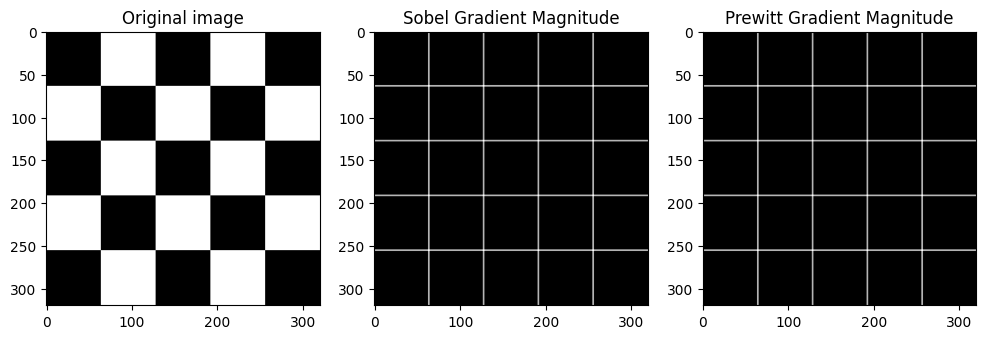

In [ ]:
img = cv2.imread("prac03ex01img01.png", cv2.IMREAD_GRAYSCALE)
#img = cv2.imread("prac03ex02img01.jpg", cv2.IMREAD_GRAYSCALE)

# Prewit kernels (x and y)
prewitt_x =
prewitt_y =

# Sobel kernels (x and y)
sobel_x =
sobel_y =

# Convolution with Sobel and Prewitt Kernels
sobel_gx =
sobel_gy =

prewitt_gx =
prewitt_gy =

# Gradient Magnitude
sobel_magnitude =
prewitt_magnitude =

# Display Results
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap = 'gray')
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Gradient Magnitude')

plt.subplot(1, 3, 3)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Gradient Magnitude')

---
## `cv2.Canny()` Function

### Parameters:
- **image**: Input grayscale image.
- **lower_threshold**: Lower bound for the hysteresis thresholding.
- **upper_threshold**: Upper bound for the hysteresis thresholding.


#### Hysteresis Thresholding:

**Strong Pixels**: Any pixel in the gradient image with an intensity greater than the high threshold is marked as a strong pixel. These are considered to be definitely part of an edge.

**Weak Pixels**: Any pixel with an intensity between the low and high thresholds is marked as a weak pixel. These might be part of an edge, but it's uncertain.

**Non-relevant Pixels**: Any pixel with an intensity below the low threshold is considered non-relevant and is discarded.

**Edge Tracking by Hysteresis**: After the initial thresholding, the image will have strong, weak, and non-relevant pixels. The final step is to transform weak pixels into strong ones if they are connected to strong pixels. This ensures continuity in the edges. If a weak pixel is not connected to a strong pixel, it's discarded.

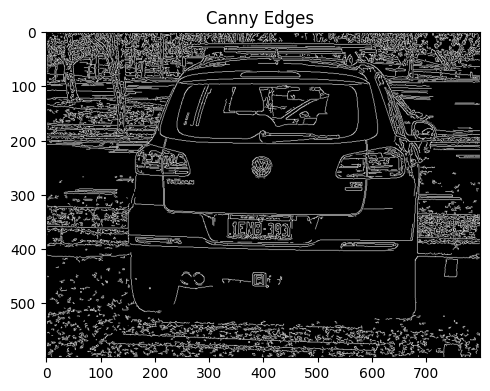

In [ ]:
#img = cv2.imread("prac03ex01img01.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("prac03ex02img01.jpg", cv2.IMREAD_GRAYSCALE)

# Canny Edge Detection - play around with the parameters
edges = cv2.Canny(img, )

# Display Results
plt.figure(figsize=(12, 12))
plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges ')
plt.tight_layout()
plt.show()

# Exercise 3 - Line Detection

In this exercise, you will experiment with the Hough transform. In the first part, you are asked to
implement your own version of the Hough transform which allows you to obtain the accumulator
array (you should export it as an intensity image to visualize it). Test your implementation with the
checkerboard image in Exercise 1 and verify that the locations of the peaks are as expected. You
may refer to the lecture slides and/or the following webpage for the Hough transform.

In the second part of this exercise, you test the Hough transform-based line detection method on
several images, including
- The ideal checkerboard used in Exercise 1;
- A diamond-shaped image;
- A natural image of a building.

You should vary the line section parameters and observe how they influence the detection results.

Explain what the threshold means for line detection? How is it related to the properties of detected
line segments in the image? Please note that edge detection is usually desired before line detection.
What will happen if you forget this step?

---
## Hough Transform

The Hough Transform is a technique used to detect any shape that can be represented mathematically. It's especially known for its ability to detect lines in an image, even if they are broken or distorted.

### Basic Concept:

- The primary idea of the Hough Transform is the representation of a point in the image space as a line in the Hough space and vice versa.

### Polar Coordinates and Sinusoidal Representation:

- Instead of using the traditional Cartesian coordinate system (y = mx + c) to represent lines, the Hough Transform uses the **Polar coordinate system** represented by `(d, θ)`.

- For a point `(x0, y0)` in the image (which is on the edge), any line passing through this point can be represented as:
  
  $$
  d = x0 \times \cos(θ) + y0 \times \sin(θ)
  $$

- For every possible value of `θ` in the range [0, 2π], the equation plots as a sinusoid in the `(d, θ)` space.

- The key insight is that all these sinusoids corresponding to points on the same line in the image space will intesect at a common point in the `(d, θ)` space.

- This section point can be detected by accumulation. The more sinusoids intesect at a point, the higher the likelihood of a line existing in the image space.

### Accumulator:

- The Hough space is divided into a grid known as the accumulator. Each cell or bin in this grid corresponds to a potential line in the image space.

- Every time a sinusoid passes through a cell in the Hough space, the value of that cell is incremented.

- Cells with values exceeding a certain threshold indicate the presence of a line in the image with the corresponding `(d, θ)` values.

### Advantages:

- Ability to detect lines, circles, and other shapes in an image.
- Robustness against noise and partial occlusions.

### Limitations:

- Computationally intensive due to the accumulator.
- Parameter tuning is often required.


---
## cv2.HoughLines(edges, rho_resolution, theta_resolution, threshold_parameter) Function

### Input and Parameters:

- **edges**: This is the input binary image, typically the output of an edge detection algorithm like `cv2.Canny()`. In this image, white pixels represent potential edge points, and black pixels are non-edges.

- **rho_resolution**: This is the resolution of the accumulator in the __rho (ρ)__ dimension, measured in pixels. __Rho (ρ)__ represents the distance from the origin to the line.

- **theta_resolution**: This is the resolution of the accumulator in the __theta (θ)__ dimension, measured in radians. __Theta (θ)__ represents the angle between the x-axis and a line perpendicular to the detected line.
  
- **threshold_parameter**: This is the threshold parameter. Only those lines are returned that get enough votes (greater than the threshold). In other words, only lines that have a number of intrsections in the accumulator greater than this threshold will be considered as detected lines.
 detected lines.


### Output:

- **lines**: This is a list of lines detected in the image. Each line is represented by its __rho (ρ)__ and __theta (θ)__ values.

### Context:

The function will detect lines in the `edges` image with a rho resolution of `rho_resolution` pixels and a theta resolution of `theta_resolution` radians (which is 1 degree). Only lines that receive `threshold_parameter` or more votes in the accumulator will be considered as detected lines.

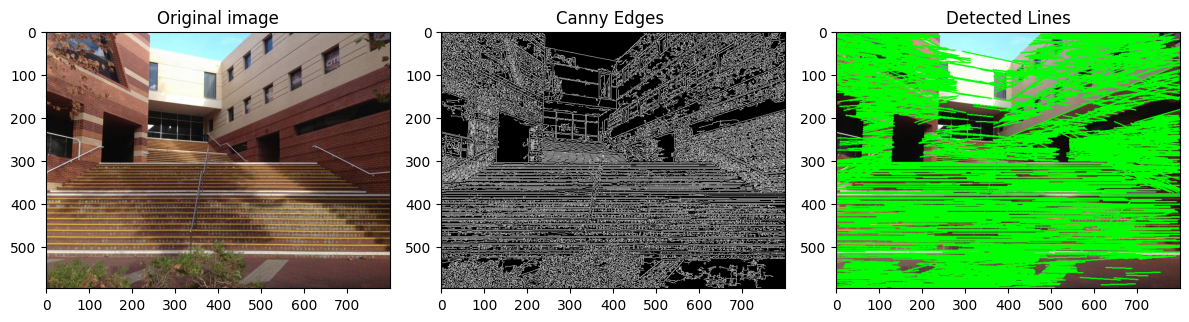

In [ ]:
# Load the image
#image_path = "prac03ex03img01.png"
image_path = "prac03ex03img02.jpg"

RGB = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
RGB_original = RGB.copy()

# Edge detection using Canny
edges = cv2.Canny(gray, )

# Apply Hough Transform
lines = cv2.HoughLines(edges, )

# Detect lines using Hough transform
lines = cv2.HoughLinesP()

# Draw green lines on the original image - play around with parameters
if lines is not None:
    for line in lines:
       # complete here

# Display the result
plt.figure(figsize=(12, 12 ))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(RGB_original, cv2.COLOR_BGR2RGB))
plt.title("Original image")

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges ')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()

---
# Exercise - 4

In this exercise, you will test blob detection using MSERs (Maximally Stable Extreme Regions). First,
review the fundamentals of MSERs from the lecture notes and suggested references. Then you
perform blob detection using the following images
- An image of several coins;
- An image of only a playing card;
- An image of a playing card lying on carpet;
- An image of a vehicle (reuse the image in Exercise 2)

For each image, examine the detected blobs. Based on the theory of MSER detection, are the results
as expected? Does it detect the blobs you expect? Does it detect other blobs that you do not expect.
What actually does the MSER detector return?

---

## Maximally Stable Extremal Regions (MSER) Algorithm:

MSER is a __region detector__ used in computer vision to detect connected parts of an image that remain nearly unchanged over a range of threshold values.

### Steps of the MSER Algorithm:

1. **Sorting Pixels by Intensity:**
    - The pixels of the image are sorted based on their intensity values.

2. **Threshold Sweeping:**
    - The algorithm sweeps through the sorted pixel intensities, starting from the darkest to the brightest, treating each unique intensity value as a threshold.

3. **Maintaining Connected Components:**
    - As the threshold is increased, new connected components (or regions) might emerge, or existing ones might merge.
    - The areas (number of pixels) of these connected components are maintained using an union-find algorithm.

4. **Analyzing Area vs. Threshold:**
    - For each potential region, the algorithm analyzes how its area changes as the threshold increases.
    - A region is considered "maximally stable" if the relative growth of its area reaches a local minimum over a range of threshold values.

5. **Fine-tuning with Parameters:**
    - The detected regions can be further refined by specifying constraints on region size, threshold range, and area variation.

6. **Ellipse Approximation:**
    - Each detected MSER can be approximated by an ellipse. This provides a compact representation and can be used for further analysis or visualization.

7. **Rejecting Regions:**
    - Regions that are too big or too small are discarded.
    - Unstable regions, which don't exhibit maximal stability, are discarded.
    - Regions that are too similar to their parent regions are also discarded to avoid redundancy.

### Key Characteristics of MSER:

- **Robustness:** MSER is invariant to affine transformations, making it robust against rotation, scale, and shear.
- **Efficiency:** The algorithm is efficient and can be used in real-time applications.
- **Stability:** MSER detects regions that are stable across different images or under varying conditions.

---

### `cv2.MSER_create()`:

The `cv2.MSER_create()` function in OpenCV initializes an MSER object which can then be used to detect MSER regions in images.

#### Parameters of the MSER object:

- **_delta (set using setDelta()):** Specifies the step between intensity thresholds used to extract the component tree of the image. A smaller delta means more regions will be detected.
- **_min_area (set using setMinArea()):** The minimum area of any stable region in pixels. Regions with an area below this threshold will be discarded.
- **_max_area (set using setMaxArea()):** The maximum area of any stable region in pixels. Regions with an area above this threshold will be discarded.


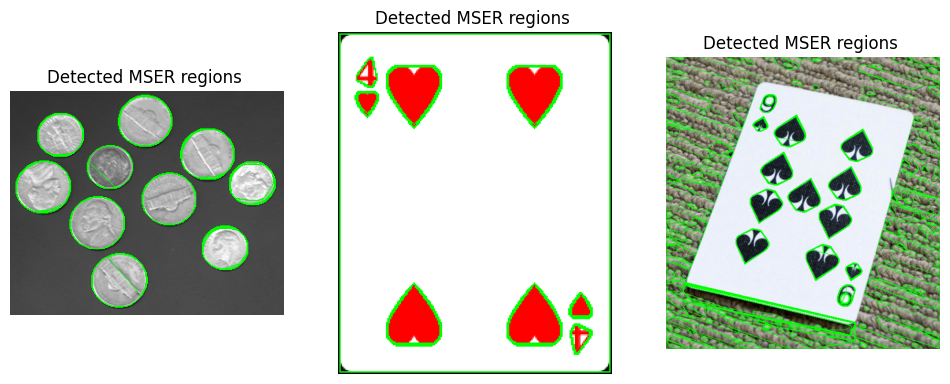

In [ ]:
images_path = ["prac03ex04img01.png",
               "prac03ex04img02.png",
               "prac03ex04img03.png"]

def mser_image(image_path):
  img_rgb =

  # Convert the image to grayscale for MSER detection
  img_gray =

  # Create an MSER object
  mser =

  # Set parameters for MSER
  mser.

  # Detect MSER regions in the grayscale image
  regions

  # Draw the detected regions on the RGB image
  hulls =
  cv2.polylines(img_rgb, )
  return img_rgb

# Display the result
plt.figure(figsize=(12, 12 ))

for i, image_path in enumerate(images_path, start=1):
  img_rgb = mser_image(image_path)
  plt.subplot(1, 3, i)
  plt.imshow(img_rgb)
  plt.title('Detected MSER regions ')
  plt.axis('off')

plt.show()